In [21]:
import numpy as np
import pandas as pd

%precision 3

'%.3f'

In [86]:
import pandas as pd

# 절대 경로를 사용하여 파일을 불러옵니다.
df = pd.read_csv(r'C:\Users\sctis\Desktop\대학과제\1학년 2학기\통계적 분석\data\ch2_scores_em.csv',
                index_col='student number')

# 데이터 확인
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [89]:
# 상위 10개 행을 추출
en_scores = df['english'][:10]
ma_scores = df['mathematics'][:10]


scores_df = pd.DataFrame({'english': en_scores,
                          'mathematics': ma_scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))

# 새로운 데이터프레임 출력
scores_df

,english,mathematics
student,,
A,NaN,NaN
B,NaN,NaN
C,NaN,NaN
D,NaN,NaN
E,NaN,NaN
F,NaN,NaN
G,NaN,NaN
H,NaN,NaN
I,NaN,NaN


In [90]:
summary_df = scores_df.copy()
summary_df['english_deviation'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['product of deviations'] =\
    summary_df['mathematics_deviation'] * summary_df['mathematics_deviation']
summary_df

,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,NaN,NaN,NaN,NaN,NaN
B,NaN,NaN,NaN,NaN,NaN
C,NaN,NaN,NaN,NaN,NaN
D,NaN,NaN,NaN,NaN,NaN
E,NaN,NaN,NaN,NaN,NaN
F,NaN,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN,NaN
H,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN


In [91]:
import matplotlib.pyplot as plt

%matplotlib inline

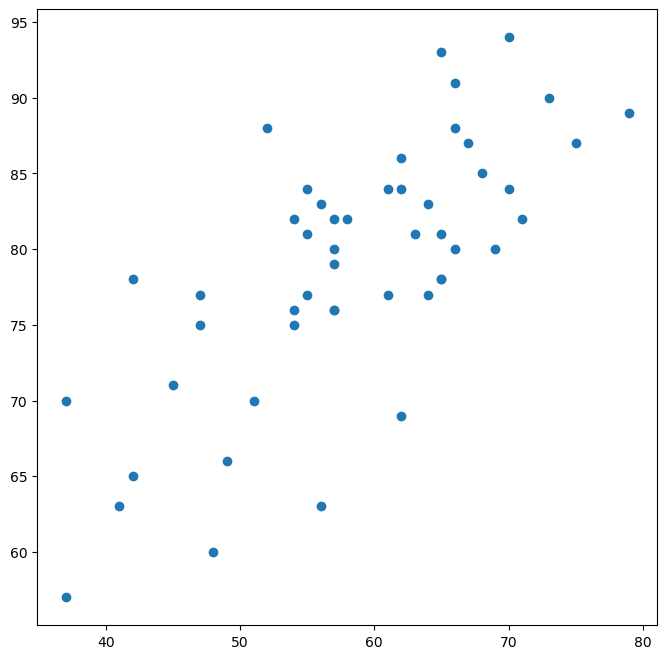

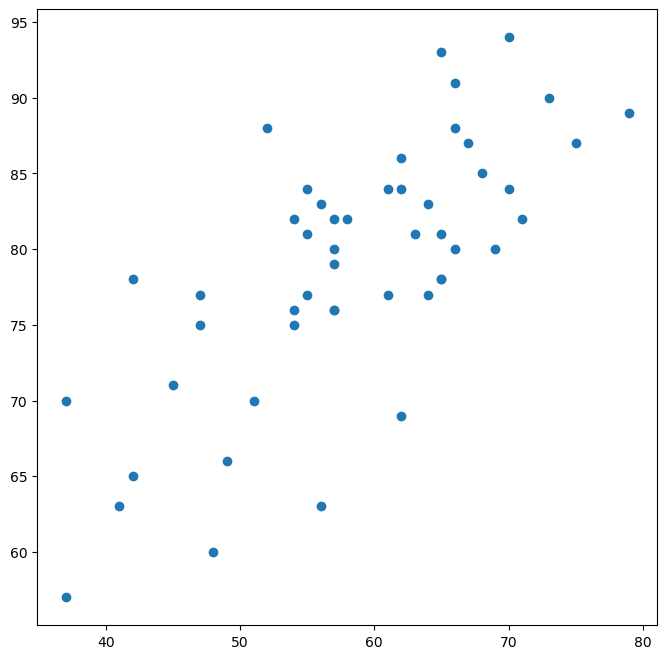

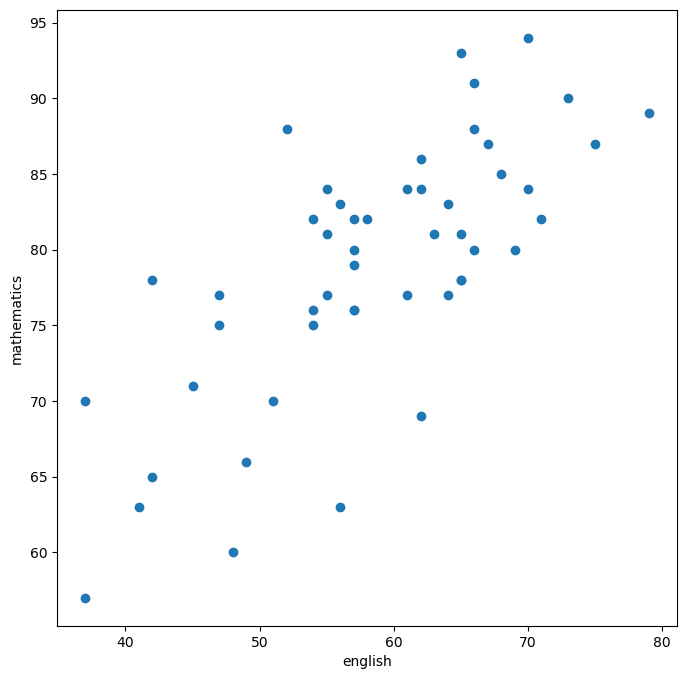

In [101]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize= (8, 8))
ax = fig.add_subplot(111)
#산접도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

In [97]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [102]:
cov_mat[0, 0], cov_mat[1, 1]

(86.000, 68.440)

In [103]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.000, 68.440)

In [104]:
cov_mat[0, 1], cov_mat[1, 0]

(62.800, 62.800)

In [109]:
np.cov(en_scores, ma_scores, ddof=0)[0, 1] /\
(np. std(en_scores) * np.std(ma_scores))

0.819

In [110]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [111]:
scores_df.corr()

,english,mathematics
english,NaN,NaN
mathematics,NaN,NaN


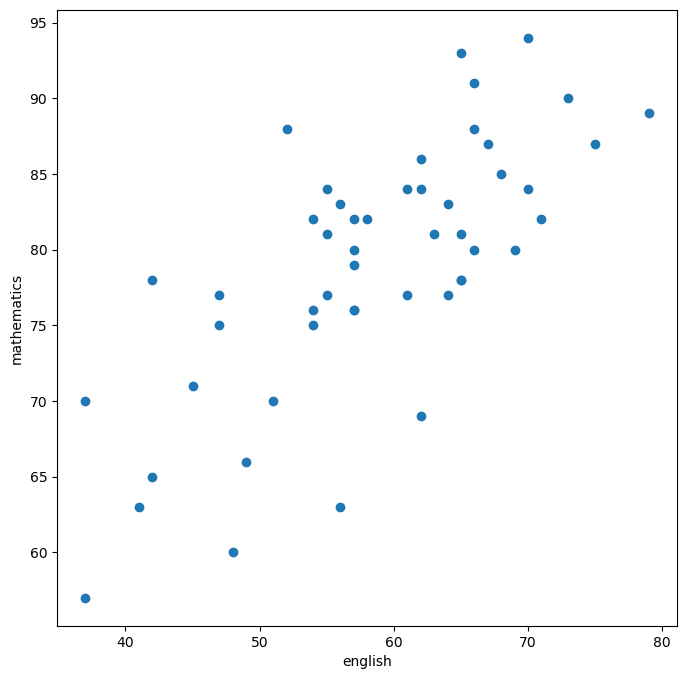

In [113]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8, 8))
ax =fig.add_subplot(111)

#산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

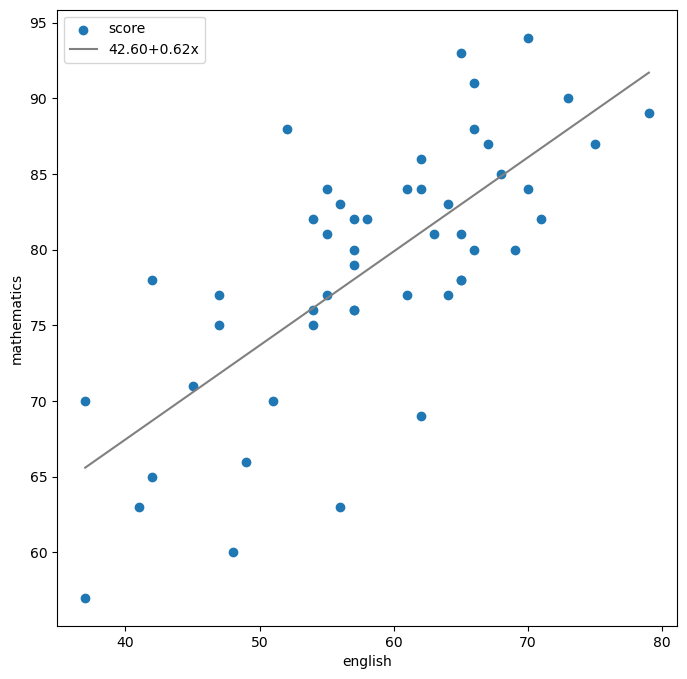

In [116]:
#계수 β_θ와 β_1를 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)
#β_θ+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)
#직선을 그리기 위해 x좌표를 생성
xs = np.linspace(english_scores.min(), english_scores.max())
# xs에 대응하는 y좌표를 구한다
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray', 
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
#벌레의 표시
ax.legend(loc='upper left')

plt.show()


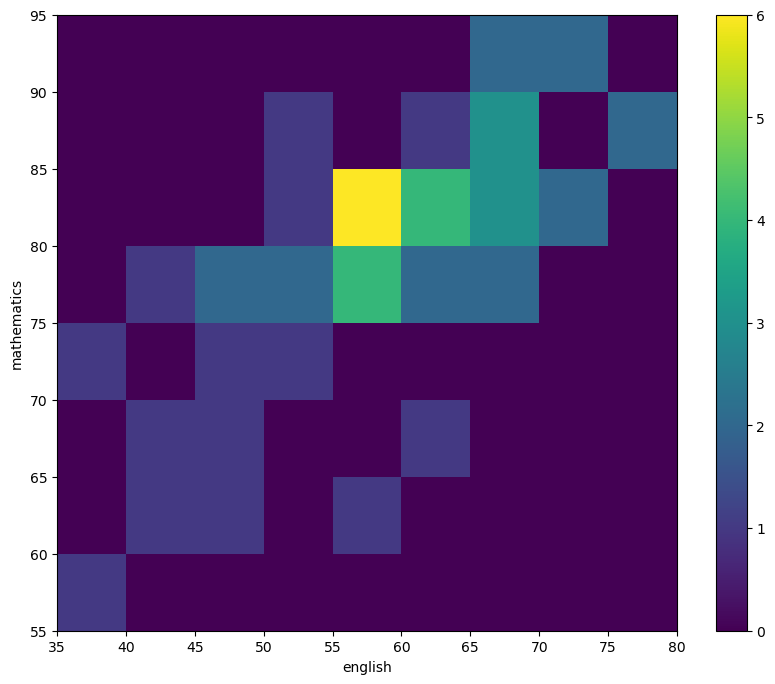

In [117]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
              bins=[9, 8], range=[(35, 80), (55, 95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

# 컬러 바의 표시
fig.colorbar(c[3], ax=ax)
plt.show()


In [136]:
anscombe_data = np.load('C:\Users\sctis\Desktop\대학과제\1학년 2학기\통계적 분석\data\ch3_anscombe.npy_em.csv')
print(anscombe_data.shape)
anscombe_data[0]

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (2188478058.py, line 1)

In [137]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression_line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] = \
    [f'{np.mean(dataX):.2f}',
     f'{np.var(dataX):.2f}',
     f'{np.mean(dataY):.2f}',
     f'{np.var(dataY):.2f}',
     f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
     f'y = {poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
stats_df

NameError: name 'anscombe_data' is not defined

In [134]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                               'Y_variance', 'X&Y_correlation',
                               'X&Y_regression_line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] = \
    [f'{np.mean(dataX):.2f}',
     f'{np.var(dataX):.2f}',
     f'{np.mean(dataY):.2f}',
     f'{np.var(dataY):.2f}',
     f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
     f'y = {poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']
stats_df

NameError: name 'anscombe_data' is not defined